In [1]:
%matplotlib inline

In [3]:
import fenics

import phaseflow

# Demonstrate the Stefan problem.

Define function to run the Stefan problem with Phaseflow.

In [15]:
def stefan_problem(time_step_count = 100,
        grid_size = 1000):

    T_h = 1.
    
    T_c = -0.01
    
    end_time = 0.1
                       
    stefan_number = 0.125
    
    nt = time_step_count
    
    nx = grid_size
    
    solution, mesh = phaseflow.run(
        output_dir = "output/convergence_stefan_problem/nt" + str(nt) + "/nx" + str(nx) + "/",
        prandtl_number = 1.,
        stefan_number = stefan_number,
        gravity = [0.],
        mesh = fenics.UnitIntervalMesh(grid_size),
        initial_values_expression = (
            "0.",
            "0.",
            "(" + str(T_h) + " - " + str(T_c) + ")*(x[0] <= 0.001) + " + str(T_c)),
        boundary_conditions = [
            {'subspace': 0, 'value_expression': [0.], 'degree': 3,
                 'location_expression': "near(x[0],  0.) | near(x[0],  1.)", 'method': "topological"},
            {'subspace': 2, 'value_expression': T_h, 'degree': 2, 
                 'location_expression': "near(x[0],  0.)", 'method': "topological"},
            {'subspace': 2, 'value_expression': T_c, 'degree': 2, 
                 'location_expression': "near(x[0],  1.)", 'method': "topological"}],
        temperature_of_fusion = 0.,
        regularization_smoothing_factor = 0.01,
        end_time = end_time,
        time_step_size = end_time/float(time_step_count),
        stop_when_steady = False)
        
    velocity, pressure, temperature = solution.split()
        
    return temperature
    

# Set the baseline.

First we obtain a baseline solution.

In [16]:
baseline_time_step_count = 100

baseline_grid_size = 1000

baseline_solution = stefan_problem(
        time_step_count = baseline_time_step_count,
        grid_size = baseline_grid_size)

Running Phaseflow with the following arguments:
({'time_step_size': 0.001, 'gravity': [0.0], 'restart_filepath': '', 'regularization_smoothing_factor': 0.01, 'prandtl_number': 1.0, 'restart': False, 'adaptive': False, 'end_time': 0.1, 'stefan_number': 0.125, 'steady_relative_tolerance': 0.0001, 'start_time': 0.0, 'nlp_absolute_tolerance': 1e-08, 'penalty_parameter': 1e-07, 'temperature_of_fusion': 0.0, 'thermal_conductivity': 1.0, 'ddT_m_B': <function run.<locals>.ddT_m_B at 0x7fd547957598>, 'initial_values_expression': ('0.', '0.', '(1.0 - -0.01)*(x[0] <= 0.001) + -0.01'), 'nlp_max_iterations': 50, 'liquid_viscosity': 1.0, 'solid_viscosity': 1e-08, 'boundary_conditions': [{'location_expression': 'near(x[0],  0.) | near(x[0],  1.)', 'value_expression': [0.0], 'degree': 3, 'method': 'topological', 'subspace': 0}, {'location_expression': 'near(x[0],  0.)', 'value_expression': 1.0, 'degree': 2, 'method': 'topological', 'subspace': 2}, {'location_expression': 'near(x[0],  1.)', 'value_expr

and plot the temperature field

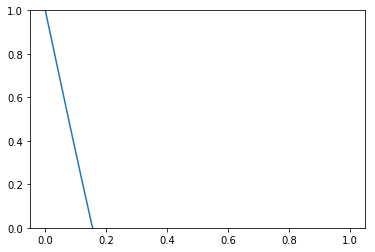

In [17]:
fenics.plot(baseline_solution)

# Converge in time.

Use a Python dict to organize the results.

In [18]:
solutions = {"nt100_nx1000": baseline_solution}

Define a function to compute new solutions and add the results to the dictionary.

In [22]:
def compute_and_append_new_solution(nt, nx, solutions):

    solution = stefan_problem(
        time_step_count = nt,
        grid_size = nx)

    solutions["nt" + str(nt) + "_nx" + str(nx)] = solution
    
    print(solutions.keys())
    
    return solutions

Set a constant rate of refinement so that convergence rates can be computed.

In [20]:
r = 2

Adjust the time step until first order temporal convergence is verified. First we attempt increasing the size. We do not yet know if this is in the asymptotic range of convergence.

In [23]:
nt = int(baseline_time_step_count/r)

nx = baseline_grid_size

solutions = compute_and_append_new_solution(nt, nx, solutions)

Running Phaseflow with the following arguments:
({'time_step_size': 0.002, 'gravity': [0.0], 'restart_filepath': '', 'regularization_smoothing_factor': 0.01, 'prandtl_number': 1.0, 'restart': False, 'adaptive': False, 'end_time': 0.1, 'stefan_number': 0.125, 'steady_relative_tolerance': 0.0001, 'start_time': 0.0, 'nlp_absolute_tolerance': 1e-08, 'penalty_parameter': 1e-07, 'temperature_of_fusion': 0.0, 'thermal_conductivity': 1.0, 'ddT_m_B': <function run.<locals>.ddT_m_B at 0x7fd5478b86a8>, 'initial_values_expression': ('0.', '0.', '(1.0 - -0.01)*(x[0] <= 0.001) + -0.01'), 'nlp_max_iterations': 50, 'liquid_viscosity': 1.0, 'solid_viscosity': 1e-08, 'boundary_conditions': [{'location_expression': 'near(x[0],  0.) | near(x[0],  1.)', 'value_expression': [0.0], 'degree': 3, 'method': 'topological', 'subspace': 0}, {'location_expression': 'near(x[0],  0.)', 'value_expression': 1.0, 'degree': 2, 'method': 'topological', 'subspace': 2}, {'location_expression': 'near(x[0],  1.)', 'value_expr

Again lets visualize the temperature field.

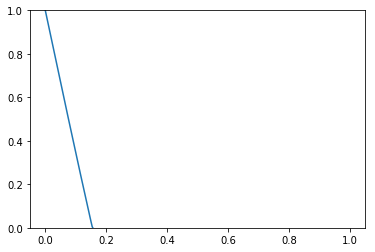

In [24]:
fenics.plot(solutions["nt50_nx1000"])

To compute a convergence rate, we need three solutions. The solution with smallest time step size will be used as the "truth". Then we can compute errors for the two coarser solutions, and compute the convergence rate from these errors. We already have two solutions, so we only need one more.

In [25]:
solutions = compute_and_append_new_solution(int(nt/r), nx, solutions)

Running Phaseflow with the following arguments:
({'time_step_size': 0.004, 'gravity': [0.0], 'restart_filepath': '', 'regularization_smoothing_factor': 0.01, 'prandtl_number': 1.0, 'restart': False, 'adaptive': False, 'end_time': 0.1, 'stefan_number': 0.125, 'steady_relative_tolerance': 0.0001, 'start_time': 0.0, 'nlp_absolute_tolerance': 1e-08, 'penalty_parameter': 1e-07, 'temperature_of_fusion': 0.0, 'thermal_conductivity': 1.0, 'ddT_m_B': <function run.<locals>.ddT_m_B at 0x7fd5478b8840>, 'initial_values_expression': ('0.', '0.', '(1.0 - -0.01)*(x[0] <= 0.001) + -0.01'), 'nlp_max_iterations': 50, 'liquid_viscosity': 1.0, 'solid_viscosity': 1e-08, 'boundary_conditions': [{'location_expression': 'near(x[0],  0.) | near(x[0],  1.)', 'value_expression': [0.0], 'degree': 3, 'method': 'topological', 'subspace': 0}, {'location_expression': 'near(x[0],  0.)', 'value_expression': 1.0, 'degree': 2, 'method': 'topological', 'subspace': 2}, {'location_expression': 'near(x[0],  1.)', 'value_expr

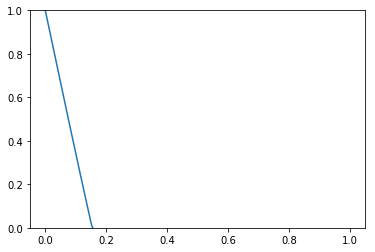

In [26]:
fenics.plot(solutions["nt25_nx1000"])

With these solutions in hand, we compute the errors with respect to the finest solution

In [27]:
errors = [fenics.errornorm(solutions["nt100_nx1000"], solutions["nt" + str(nt) + "_nx1000"], "L2") 
          for nt in [50, 25]]

print(errors)

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
  Ignoring precision in integral metadata compiled using quadrature representation. Not implemented.
Calling FFC just-in-time (JIT) compiler, this may take some time.
[0.0005624865526258667, 0.0016902683539816517]


We compute the order of convergence as

In [28]:
import math

def compute_order(fine, coarse):
    
    return math.log(fine/coarse)/math.log(1./r)

which gives us

In [29]:
order = compute_order(errors[0], errors[1])

print(order)

1.5873618015887165
